## Chinese Restaurant Process:
<font size="3"> 

A Chinese restaurant has an infinite number of tables, each of the tables has no limit on the number of customer seated at that table. The first customer seats at the first table, the second customer will seat to the first table with a proportion of $\frac{1}{\alpha+1}$ and choose a new table with the proportion $\frac{\alpha}{\alpha+1}$. Extrapolating this process until the customer n, this customer will seat at any of the occupied tables with the probability of first equation and at a new table with probability of the second:

$$
	P(cust_{n} = table\ c/ cust_{1}, ..,cust_{n-1}) = \frac{n_{c}}{\alpha + \sum\limits_{c\ \in \varrho} n_{c}} \\
	P(cust_{n} = new\ table/ cust_{1}, ..,cust_{n-1}) = \frac{\alpha}{\alpha + \sum\limits_{c\ \in \varrho} n_{c}} \\
	where\ \sum\limits_{c\ \in \varrho} n_{c} = n-1
$$

 The CRP defines a prior over the partitioning of the sample space $S$, inducing a distribution over partitions of the sample space. The Chinese restaurant process takes the clustering property of the Dirichlet process without the base measure $H$, we can see the clustering property in the probability of table assignations,  tables with more customers tend to get more customers $P(customer\ n\ at\ table\ c) \propto n_{C}$.
 

The number of tables depend on the number of customers $n$ and the concentration parameter $\alpha$, both the mean and variance are logarithmically proportional to the the number of customers scaled by the concentration parameter. 
$$
		E[|\varrho|; n, \alpha] = \sum_{i=1}^{n} \frac{\alpha}{\alpha+i-1} = \alpha (\psi(\alpha + n) - \psi(\alpha)) \simeq \alpha log(1 + n/\alpha)\ for\ n, \alpha \gg 0 \\
		Var[|\varrho|; n, \alpha] = \alpha (\psi(\alpha + n) - \psi(\alpha)) + \alpha^{2}(\psi'(\alpha + n) - \psi'(\alpha)) \simeq \alpha log(1 + n/\alpha)\ for\ n>\alpha \gg 0 \\
		where\ \psi (.)\ is\ the\ digamma\ function.
$$

* Aldous, D.J. (1985) Exchangeability and Related Topics. Springer, Berlin, 1-198

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
plt.style.use("seaborn-darkgrid")

# Figure size fonts for latex:
title_size = 44
axis_size = 42
legend_size = 40

# Regular font size:
title_size = 24
axis_size = 22
legend_size = 20

In [2]:
def compute_cum_prob(counts, alpha):
    probs = np.array(counts)
    norm = probs.sum() + alpha
    probs = probs/norm
    probs = list(probs)
    probs.append(alpha/norm)
    
    cum = np.zeros(len(probs))
    for i in range(len(probs)):
        cum[i] = np.sum(probs[:i+1])        
    return cum

def new_customer(counts, alpha):
    unif = stats.uniform()
    u = unif.rvs(1)
    cum = compute_cum_prob(counts, alpha)
    for i, prob_c in enumerate(cum):
        if u < prob_c:
            if i == len(cum)-1:
                counts.append(1)
            else:
                counts[i] +=1
            break
    return counts

def chinese_restaurant_process(counts, alpha, n_cust):
    for j in range(n_cust):
        counts = new_customer(counts, alpha)
    return counts

### Figure :
<font size="3"> 

Figures on samples from a CRP with $1000$ customers for different alpha values $1$, $10$, $100$.

We can see the logarithmic dependency on the expected number of tables and also the variance depending on $\alpha$:

$$
		E[|\varrho|; n, \alpha] \simeq \alpha log(1 + n/\alpha)\ for\ n, \alpha \gg 0 \\
		Var[|\varrho|; n, \alpha] \simeq \alpha log(1 + n/\alpha)\ for\ n>\alpha \gg 0
$$


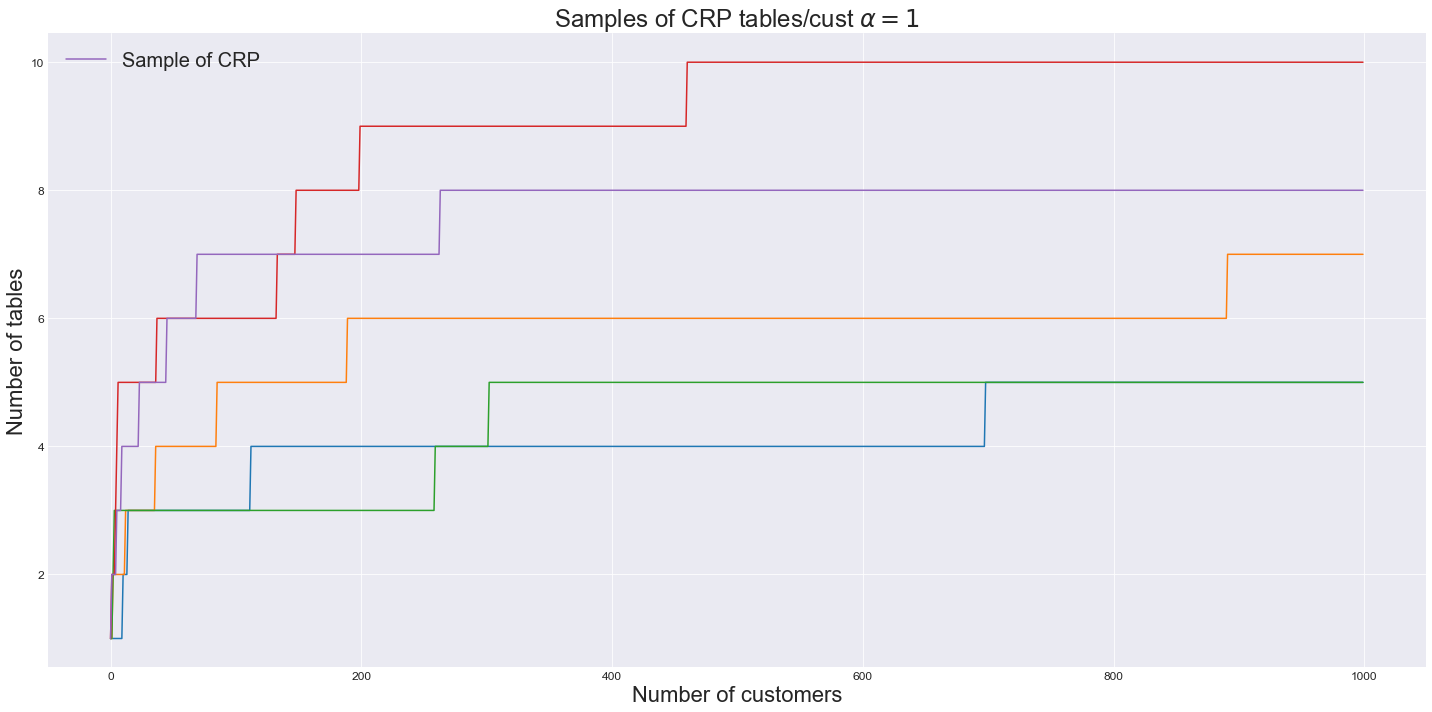

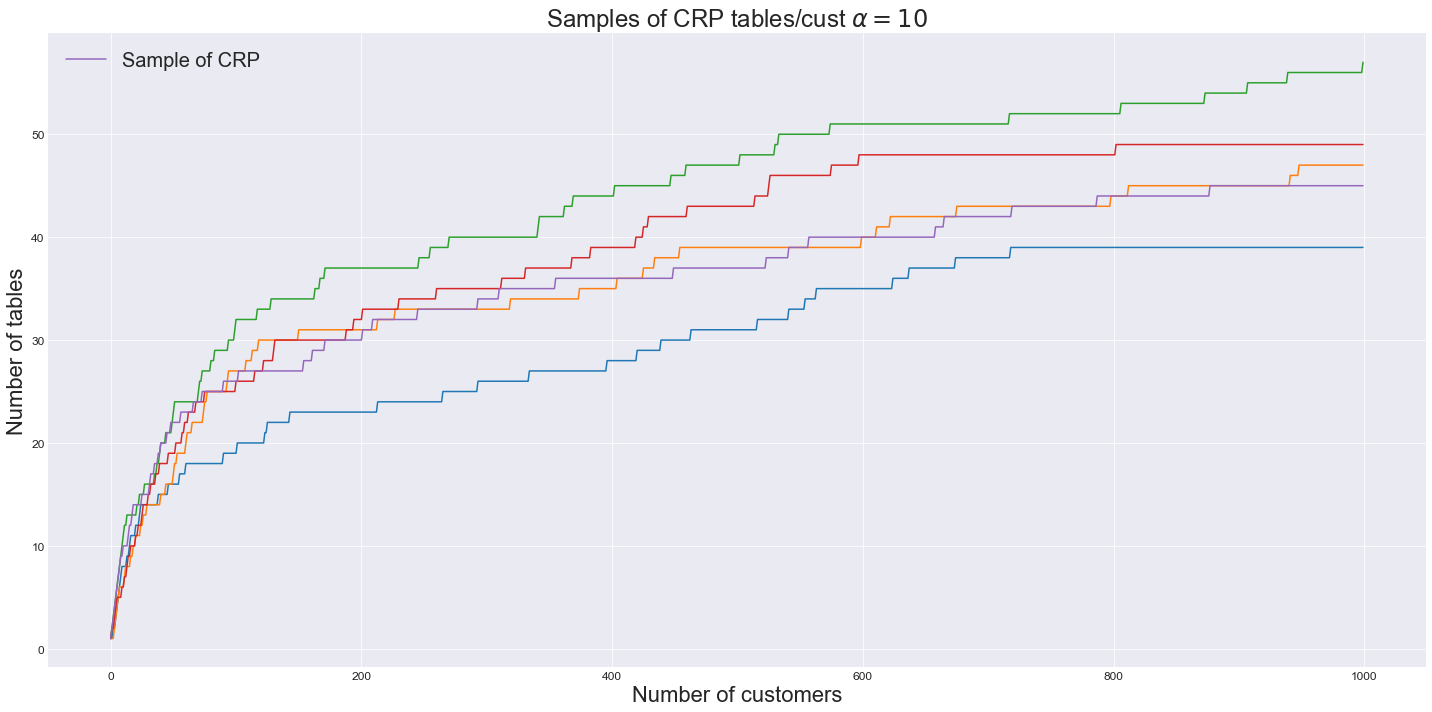

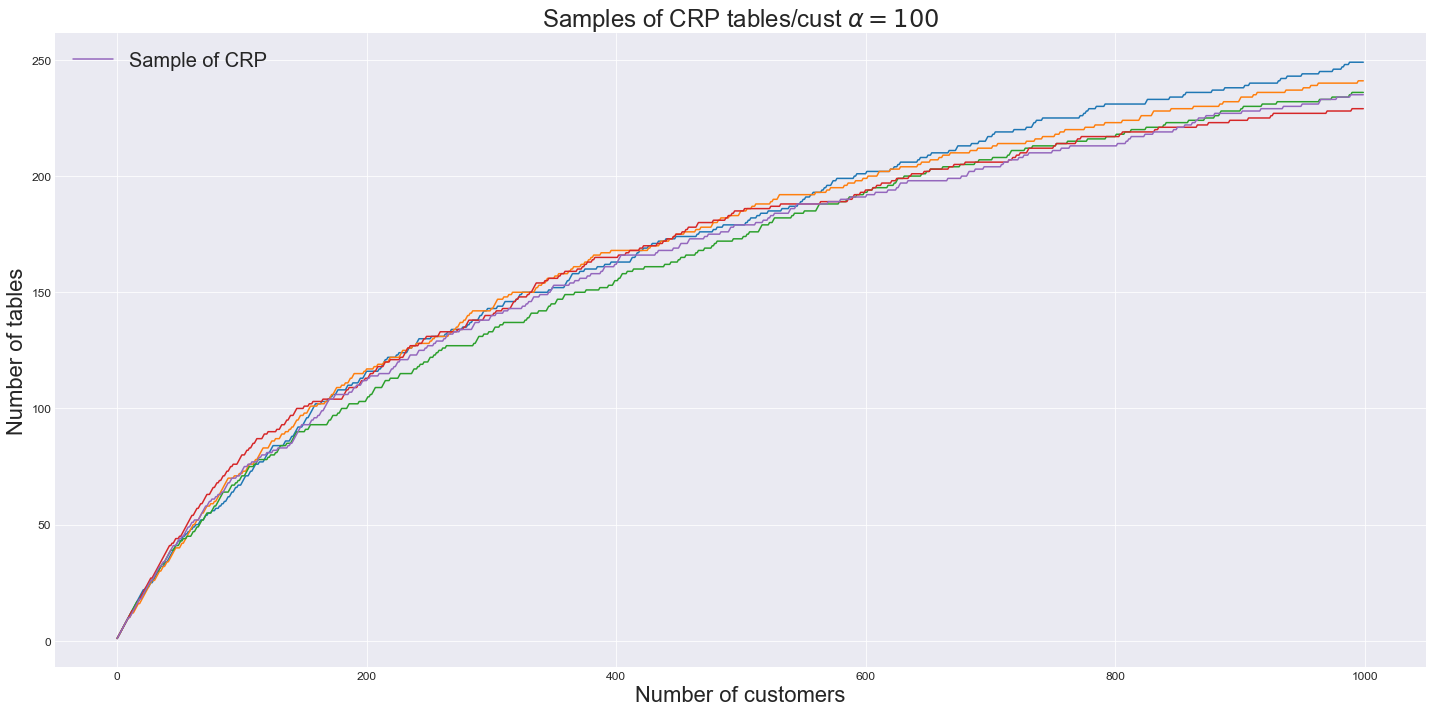

In [3]:
def main():
    # Plot parameters
    total_customers = 1000
    samples_crp = 5

    for alpha in [1, 10, 100]:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)

        for j in range(samples_crp):
            counts = list()
            num_tables = list()
            for i in range(total_customers):
                counts = chinese_restaurant_process(counts, alpha, n_cust=1)
                num_tables.append(len(counts))
                print('Processed customer: Alpha %s Sample %s %s/%s' % (alpha, j, i+1, total_customers))
                clear_output(wait=True)
            if j != samples_crp-1:
                ax.plot(range(total_customers), num_tables)
        ax.plot(range(total_customers), num_tables, label='Sample of CRP')    
        ax.set_title(r'Samples of CRP tables/cust $\alpha=%s$' % alpha, size=title_size)
        ax.set_ylabel('Number of tables', size=axis_size)
        ax.set_xlabel('Number of customers', size=axis_size)
        ax.tick_params(labelsize=axis_size-10) 
        plt.legend(prop={'size': legend_size})
        plt.tight_layout()
        plt.savefig('images/crp/chinese_restaurant_process_tables_alpha_%s.png' % alpha, dpi=100)
        
main()        